<a href="https://colab.research.google.com/github/shiernee/Advanced_ML/blob/main/Week9/WOA7015_Wk9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WOA7015 Advance Machine Learning Lab - Week 9
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


# Section1 : Massage Passing
In this section, we go through the computation we covered in Massage Passing  

In [ ]:
import numpy as np
from scipy.linalg import sqrtm 
from scipy.special import softmax
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from IPython.display import HTML

### create adjacent matrix in slide 56. 

<br>
<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week9/Adj_matrix.PNG" width="512"/>

In [ ]:
# create adjacent matrix as above


array([[0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
#@title Solution
A = np.array(
    [[0, 1, 0, 0, 0], 
     [1, 0, 1, 0, 0], 
     [0, 1, 0, 1, 1], 
     [0, 0, 1, 0, 0], 
     [0, 0, 1, 0, 0]]
)
A

In [ ]:
# create feature vector with [1,2,3,4,5] of a shape of (5,1)


array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
#@title Solution
feats = np.arange(A.shape[0]).reshape((-1,1))+1
feats

In [ ]:
# matrix multiplication - @. 
# compute new feature vector using sum 


array([[ 2],
       [ 4],
       [11],
       [ 3],
       [ 3]])

In [ ]:
#@title Solution
H = A @ feats
H

### Scale neighborhood sum by neighborhood size (i.e. average values)

In [ ]:
# create degree matrix 


array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
#@title Solution
D = np.zeros(A.shape)
np.fill_diagonal(D, A.sum(axis=0))
D

In [ ]:
# compute D inverse 


array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [ ]:
#@title Solution
D_inv = np.linalg.inv(D)
D_inv

In [ ]:
# compute Scaled adjacent matrix 


In [ ]:
#@title Solution
A_avg = D_inv @ A 

In [ ]:
# compute new features vector using average 


array([[2.        ],
       [2.        ],
       [3.66666667],
       [3.        ],
       [3.        ]])

In [ ]:
#@title Solution
H_avg = A_avg @ feats
H_avg

# Section 2: Water drop experiment using GCN 

In [ ]:
import networkx as nx

# create a network based on matrix A
g = nx.from_numpy_array(A)


### Create network and visualize the network 

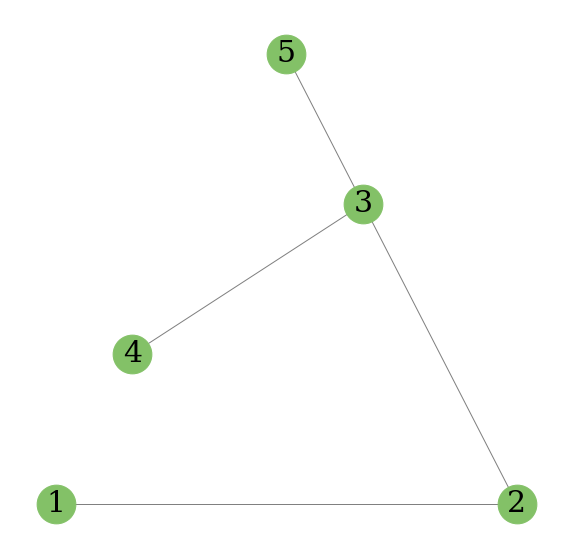

In [ ]:
node_labels = {i: i+1 for i in range(g.number_of_nodes())}
pos = nx.planar_layout(g)

fig, ax = plt.subplots(figsize=(10,10))
nx.draw(
    g, pos, with_labels=True, 
    labels=node_labels, 
    node_color='#83C167', 
    ax=ax, edge_color='gray', node_size=1500, font_size=30, font_family='serif'
)
plt.savefig('simple_graph.png', bbox_inches='tight', transparent=True)

In [ ]:
# commpute A_tilda = A + identify matrix
print(g.number_of_nodes())
print()
print(np.eye(g.number_of_nodes()))
print()
A_tilda = A + np.eye(g.number_of_nodes())

print(A_tilda)

5

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

[[1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1.]]


In [ ]:
# compute D_tilda_inverse_root for A_tilda:


# Inverse square root of D:


[[2. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [0. 0. 4. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 2.]]

[[0.70710678 0.         0.         0.         0.        ]
 [0.         0.57735027 0.         0.         0.        ]
 [0.         0.         0.5        0.         0.        ]
 [0.         0.         0.         0.70710678 0.        ]
 [0.         0.         0.         0.         0.70710678]]


In [ ]:
#@title Solution
# compute D_tilda_inverse_root for A_tilda:
D_tilda = np.zeros_like(A_tilda)
np.fill_diagonal(D_tilda, A_tilda.sum(axis=1).flatten())
print(D_tilda)
print()

# Inverse square root of D:
D_tilda_invroot = np.linalg.inv(sqrtm(D_tilda))
print(D_tilda_invroot)

In [ ]:
# compute A_hat 


In [ ]:
#@title Solution
A_hat = D_tilda_invroot @ A_tilda @ D_tilda_invroot

In [ ]:
# Perform water drop experiment. Initially, only H[0,0]= 1. Iterate 10 times. 

H = np.zeros((g.number_of_nodes(), 1))
H[0,0] = 1 # the "water drop"
iters = 80
results = [H.flatten()]
print('signal input: ' + str(H.flatten()))

for i in range(iters):
    H = A_hat @ H
    print('--------------------------------')
    print('iteration: ' + str(i) + ' signal output: ' + str(H.flatten()))
    results.append(H.flatten())

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

kwargs = {'cmap': 'hot', 'node_size': 1500, 'edge_color': 'gray', 
          'vmin': np.array(results).min(), 'vmax': np.array(results).max()*1.1}

def update(idx):
    ax.clear()
    colors = results[idx]
    nx.draw(g, pos, node_color=colors, ax=ax, **kwargs)
    ax.set_title(f"Iter={idx}", fontsize=20)

anim = animation.FuncAnimation(fig, update, frames=len(results), interval=1000, repeat=True)


In [ ]:
anim.save(
    'water_drop.mp4', 
    dpi=600, bitrate=-1,
    savefig_kwargs={'transparent': True, 'facecolor': 'none'},
)

HTML(anim.to_html5_video())

# Exercise - 30min
1. plot the graph of every node across iteration. You should have 5 graphs, which each graph represent one node. 
2. at which iteration, does the solution converge (meaning reach steady state)? 



In [ ]:
# plot your graph here 

In [ ]:
#@title At what iteration the solution converge? 
Answer ="" #@param {type :'string'}

In [ ]:
#@title Solution 
# plot your graph here
import pandas as pd

for i in range(5):
  plt.plot(np.arange(iters+1), pd.DataFrame(results)[i], label=str(i))
  plt.xlabel('iteration')
  plt.ylabel('values in node ')
  # plt.ylim([0.15, 0.2])
  
plt.grid()
plt.legend()

# check raw values 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame(results))

# Acknowledgement
This exercise is inspired from https://github.com/zjost/blog_code/blob/master/gcn_numpy/message_passing.ipynb 

## Additional Resources for your own reading 
1. MNIST classification by GCN - https://github.com/dna1980drys/mnistGNN
2. other example - https://github.com/danielegrattarola/spektral/tree/31ddf0770f9dc94337ea4e8b0fa284783496b42c/examples 
